In [1]:
import pickle as pkl
import numpy as np
from activation import ReLU, Sigmoid, Linear
from network import Network, NetworkParams, PredictionType
from layer import Layer, LayerParams

file_path = 'assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

print(data)

%load_ext autoreload 
%autoreload 2

{'w1': array([[-0.00529397,  0.37932295],
       [-0.58198076, -0.5203875 ],
       [-0.27234524,  0.1896159 ],
       [-0.01401001,  0.56065756],
       [-0.06275153,  0.18710935],
       [-0.2136969 , -0.13899273],
       [-0.6755334 , -0.46830416],
       [-0.29148576,  0.02619374],
       [ 0.27954417,  0.42428023],
       [-0.47937673, -0.30791873]], dtype=float32), 'w2': array([[-0.12326556,  0.27322105, -0.2049724 , -0.14557004, -0.2209295 ,
        -0.2961666 , -0.18459494,  0.27182874,  0.14110664,  0.1532669 ],
       [ 0.01663092, -0.16212475,  0.05350089, -0.2952602 , -0.22849551,
        -0.1630249 ,  0.19952008,  0.18541107, -0.14024544, -0.01141027],
       [ 0.20224687,  0.3143725 ,  0.12550515,  0.04272011,  0.21202639,
        -0.18619564,  0.05892715, -0.24517313, -0.21917307, -0.16335806],
       [ 0.14308453,  0.12717429, -0.18731831,  0.09553465,  0.1736002 ,
        -0.03991345,  0.01207405,  0.07327145,  0.19618031,  0.30364004],
       [-0.24369258, -0.11588791

In [2]:
network_def: NetworkParams = {
    "input_shape": 2,
    "output_shape": 1,
    "prediction_type": PredictionType.REGRESSION,
    "layers": [
        {
            "input_shape": 2,
            "n_neurons": len(data['w1']),
            "weight_init": data['w1'],
            "bias_init": data['b1'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w1']),
            "n_neurons": len(data['w2']),
            "weight_init": data['w2'],
            "bias_init": data['b2'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w2']),
            "n_neurons": len(data['w3']),
            "weight_init": data['w3'],
            "bias_init": data['b3'] ,
            "activation": Linear(), 
        }
    ]
} 


In [3]:
network = Network(network_def)
network.print_params()

input_shape: 2
output_shape: 1
Num layers: 3

Layer [0]
Neurons:    10; Inputs: 2
Weights:(10, 2) [[-0.00529397  0.37932295]
 [-0.58198076 -0.52038747]
 [-0.27234524  0.18961591]
 [-0.01401001  0.56065756]
 [-0.06275153  0.18710935]
 [-0.2136969  -0.13899273]
 [-0.67553341 -0.46830416]
 [-0.29148576  0.02619374]
 [ 0.27954417  0.42428023]
 [-0.47937673 -0.30791873]]
Biases:(10,)  [ 0.25683326  0.58717293 -0.14552271  0.52913636 -0.11397386  0.07482189
  0.64026839 -0.65596199 -0.44515052 -0.17901486]
W grads: (10, 2) [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
B grads: (10,)   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Activation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last input: [0. 0.]

Layer [1]
Neurons:    10; Inputs: 10
Weights:(10, 10) [[-0.12326556  0.27322105 -0.2049724  -0.14557004 -0.2209295  -0.2961666
  -0.18459494  0.27182874  0.14110664  0.15326691]
 [ 0.01663092 -0.16212475  0.05350089 -0.29526019 -0.22849551 -0.1630249
   0.19952008  0.1854

In [4]:
def get_loss(y, y_hat): 
    return 0.5*((y_hat - y)**2)

y =  network.forward([3,2])

network.backward(y-(-1))


LINEAR
[[0.         0.         0.         0.20855011 0.17882824 0.
  0.         0.03837755 0.18225714 0.15800119]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.88458338e-03  0.00000000e+00  0.00000000e+00 -1.42959121e-02
  -6.39861096e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.10394759e-02  0.00000000e+00]
 [-1.10357114e-01  0.00000000e+00  0.00000000e+00 -1.77572265e-01
  -7.94783734e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.37123446e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 

In [5]:
epochs = 5
loss_vals = []
data_size = len(data)
for iteration in range(epochs): 
    print(f'ITERATION {iteration}')
    current_loss = 0
    network.zero_grad()
    for index, input in enumerate(data['inputs']):
        y_pred = network.forward(input)
        y = data['targets'][index] 
        loss = get_loss(y, y_pred)
        current_loss += loss
        
        # TODO: I DON'T THINK THIS IS RIGHT SINCE IT SAYS UPDATE PARAMS ONCE PER BATCH BUT THAT MESSES UP LOSS FUNCTION
        network.backward(y_pred - y)
    network.update_params(0.01, data_size)
        
    loss_vals.append(current_loss/len(data["inputs"]))
   

ITERATION 0
LINEAR
[[ 0.          0.         -0.04565426 -0.24472707 -0.47741815  0.
  -0.39008707 -0.01955323 -0.39353981 -0.52450785]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.19178177 -0.14004953  0.         -0.35153316  0.          0.
  -0.1703903   0.          0.          0.        ]
 [ 0.014609    0.01066829  0.          0.02677808  0.          0.
   0.0129795   0.          0.          0.        ]
 [ 0.18146118  0.13251287  0.          0.33261566  0.          0.
   0.16122087  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.13754305 -0.10044145  0.         -0.25211438  0.          0.
  -0.1222014   0.          0.          0.        ]
 [ 0.00130947  0.00095625  0.          0.002

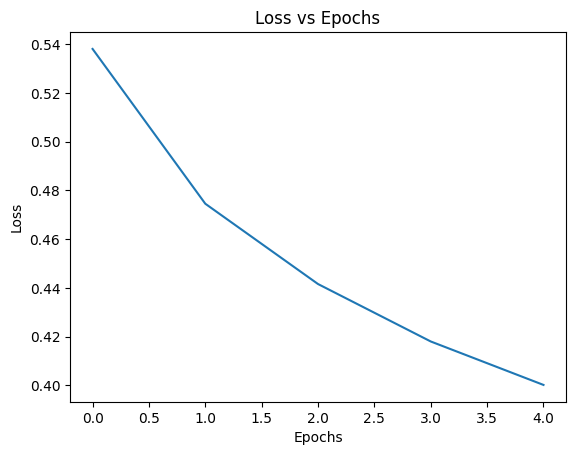

In [6]:
from matplotlib import pyplot as plt

plt.plot(loss_vals)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()